In [1]:
# Load all the libraries I know.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
#pd.plotting.scatter_matrix(data, figsize=[12, 12]);


In [6]:
abs(data.corr()) > 0.70

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [7]:
# Why is this saying that there are duplicates when I don't see any?
duplicates = data[data.duplicated(subset='id')]
print(len(duplicates))
duplicates.head()

177


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [8]:
data.loc[data['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.5,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.5,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.687,-122.386,1570,4500


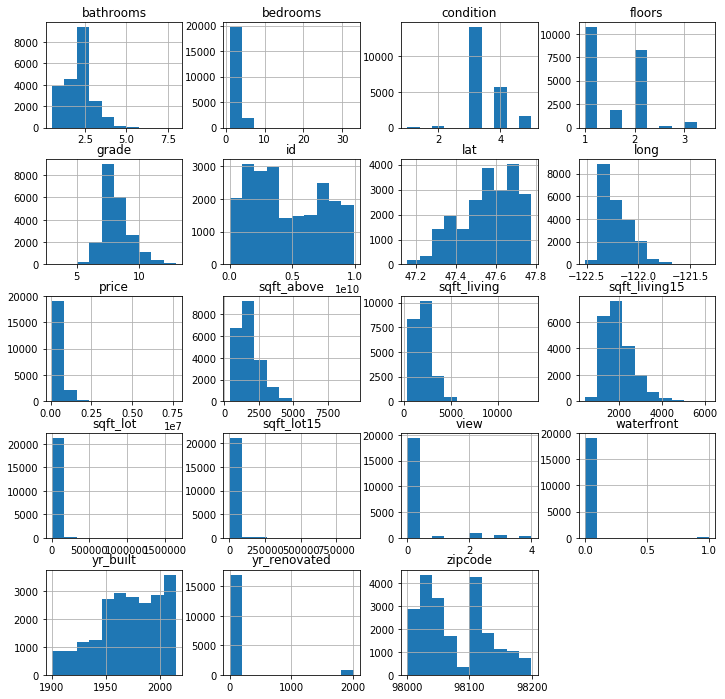

In [9]:
data.hist(figsize  = [12, 12]);

Dealing with Categorical Variables
Up to this point you've only seen continuous predictor variables. Here, you'll get a further look at how to identify and then transform categorical variables to utilize them as predictors of our target variable.

Multicollinearity of Features
While multiple predictors will ultimately increase model performance and yield better predictions, there are also possible negative effects when using multiple predictors that have a high correlation with each other. This is known as multicollinearity and can muddy model interpretation.

Feature Scaling and Normalization
Another consideration when using multiple predictors in any model is the scale of those features. For example, a dataset surrounding households might have a number of children feature and an income feature. These two variables are of vastly different scales and as such, simply having a feature like income which is on a much larger scale can impact its influence over the model. To avoid this, it is best practice to normalize the scale of all features before feeding the data to a machine learning algorithm.

Multiple Linear Regression in Statsmodels
After covering a lot of the key theories, you'll then get some hands-on practice in performing multiple linear regressions using Statsmodels and sci-kit learn.

Model Fit and Validation

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)


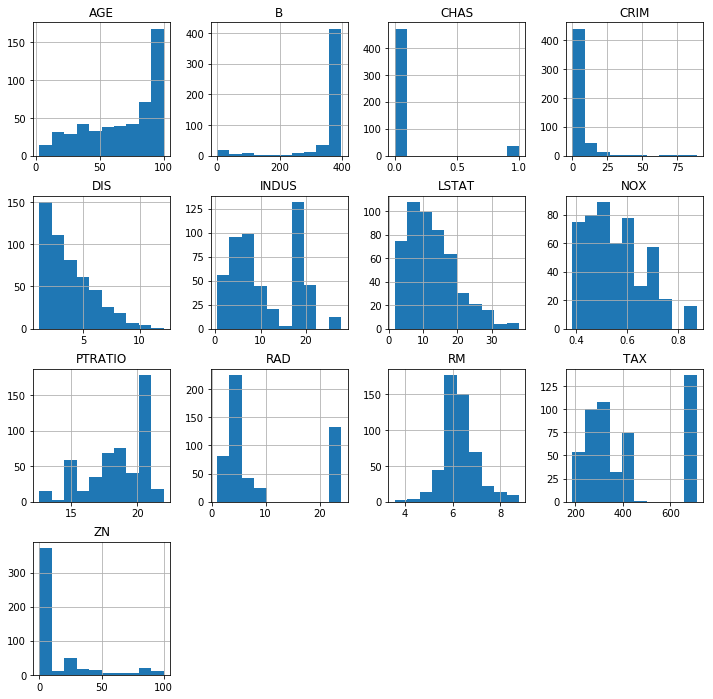

In [11]:
boston_features.hist(figsize  = [12, 12]);


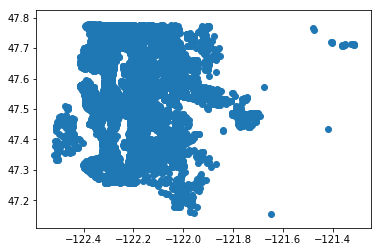

In [12]:
plt.scatter(data['long'],data['lat'])

In [13]:
data.lat.describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [14]:
import folium
m = folium.Map(location=[47.5, -121.8], zoom_start=8, width=700, height=400)
m

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.kingcounty.gov/~/media/operations/GIS/maps/vmc/images/zipcodes_586.ashx?la=en", width=500, height=500)


id Drop - categorical data, has no meaning
dateDate Object - need to change format or categorize by month or year
pricePrice - Independent Variable
bedroomsNumber - Has an outlier of 33. Either drop this row or change it to the median '3'
bathroomsNumber - Continuous
sqft_livingsquare - Continuous but could effect multicolinearity
sqft_lotsquare - Continuous but could also effect multicolinearity
floorsTotal - Categorical
waterfront - Has missing data, lots of zeros, and is categorical - drop or clean up and bin
view - Also has missing data, is categorical - clean up and bin
condition - Categorical - could be binned
grade - Categorical - could be binned
sqft_above - Continuous but could effect multilinearity - probably going to drop
sqft_basement - Missing data, has many "?", and is an object.
yr_built - Continuous
yr_renovated - Has lots of zeros
zipcode - Categorical data - could be dropped or binned based on location.
lat -
long -
sqft_living15 - Continuous but with outliers - also could effect multicoliniarity.
sqft_lot15 - Continuous but with outliers - also could effect multicoliniarity.

In [16]:
#sns.regplot(x="column", y="price", data=data)

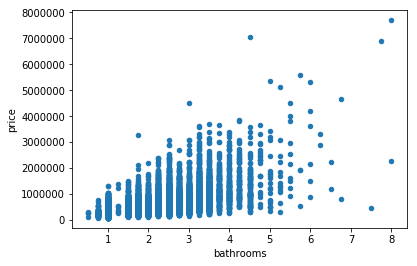

In [17]:
data.plot.scatter(x="bathrooms", y="price")

In [19]:
#fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10,10))
#x = data.drop(["price"], axis=1)
#for i in range(1,20):
#    row = (i-1)//5
#    col = i%4-1
#    ax = axes[row][col]
#    ax.plot(x, 'price')
#    ax.set_title('{}*x'.format(i))

In [20]:
data.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

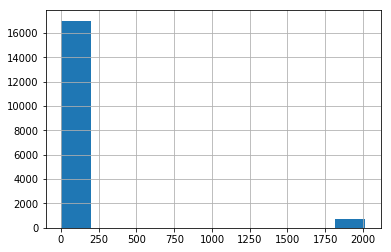

In [21]:
data.yr_renovated.hist()

In [22]:
data.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [23]:
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)

In [24]:
# Total Number of Homes, Median Homes Renovated, Most Recent Renovation
data.yr_renovated.describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [25]:
# Number of Homes Never Renovated, Years with most Renovations
data.yr_renovated.value_counts().head()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [26]:
# Percent of Homes Not Renovated
len(data.loc[data["yr_renovated"] == 0])/len(data.yr_renovated)

0.9655507709404084

In [27]:
# Number of Homes Renovated
len(data.loc[data["yr_renovated"] > 0])

744

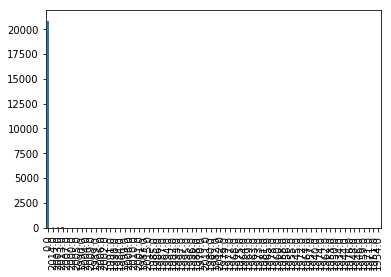

In [28]:
data.yr_renovated.value_counts().plot(kind='bar')

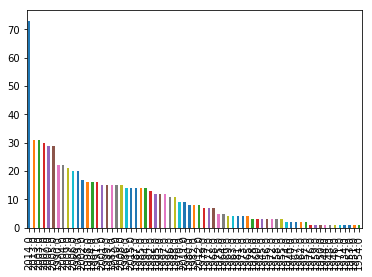

In [29]:
new_df = data[data.yr_renovated > 0]
new_df.yr_renovated.value_counts().plot(kind="bar")


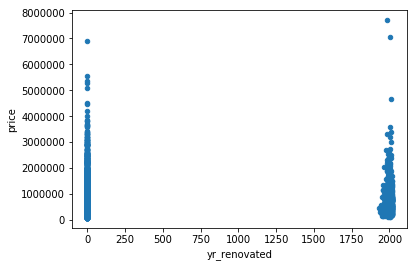

In [30]:
data.plot.scatter(x="yr_renovated", y="price")

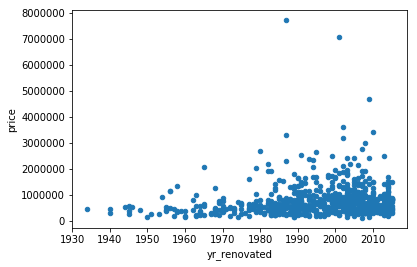

In [31]:
new_df.plot.scatter(x="yr_renovated", y="price")

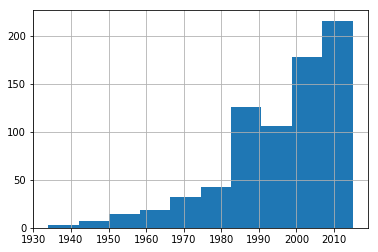

In [32]:
new_df.yr_renovated.hist()

Text(0.5, 1.0, 'King County Renovated Homes')

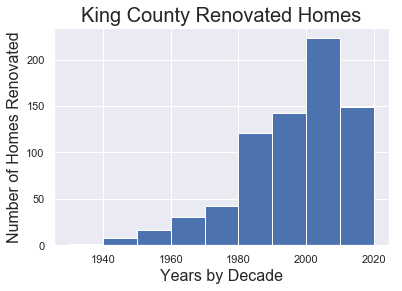

In [80]:
new_df.yr_renovated.hist(bins=[1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.xlabel('Years by Decade',fontsize=16)
plt.ylabel('Number of Homes Renovated',fontsize=16)
plt.title("King County Renovated Homes", fontsize=20)

In [34]:
new_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.440000e+02,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,652.000000,743.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,4.418716e+09,7.689019e+05,3.459677,2.306116,2327.377688,16215.530914,1.504704,0.044479,0.600269,3.219086,7.752688,1878.719086,1939.455645,1995.928763,98095.623656,47.580564,-122.262043,1988.877688,13390.768817
std,2.908265e+09,6.271258e+05,1.068823,0.898233,1089.002040,38235.308760,0.493202,0.206314,1.212180,0.520494,1.196954,849.441413,22.088850,15.599946,54.861316,0.120855,0.129586,715.440144,26213.648057
min,3.600057e+06,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,0.000000,0.000000,1.000000,4.000000,520.000000,1900.000000,1934.000000,98001.000000,47.196000,-122.497000,828.000000,1281.000000
25%,1.922985e+09,4.122500e+05,3.000000,1.750000,1560.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1267.500000,1921.000000,1987.000000,98040.000000,47.523350,-122.358000,1460.000000,5000.000000
50%,3.899100e+09,6.075020e+05,3.000000,2.250000,2200.000000,7375.000000,1.500000,0.000000,0.000000,3.000000,8.000000,1730.000000,1941.500000,2000.000000,98112.000000,47.602800,-122.292000,1850.000000,7455.000000
75%,7.014200e+09,9.000000e+05,4.000000,2.750000,2872.500000,12670.750000,2.000000,0.000000,0.000000,3.000000,8.000000,2300.000000,1955.000000,2007.250000,98126.000000,47.670950,-122.210000,2380.000000,10925.750000
max,9.829200e+09,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,1.000000,4.000000,5.000000,13.000000,8570.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,310582.000000


([<matplotlib.axis.YTick at 0x1c28a5bb70>,
 <a list of 15 Text yticklabel objects>)

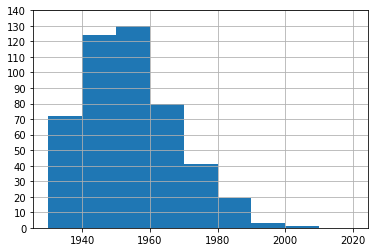

In [35]:
new_df.yr_built.hist(bins=[1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.yticks(np.arange(0, 150, 10))

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


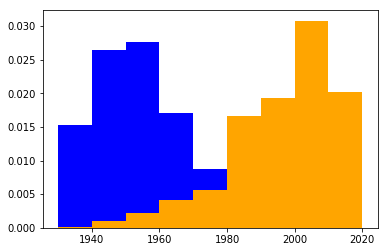

In [36]:
plt.figure()
plt.hist(new_df.yr_built, bins=[1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], stacked=True, normed = True, color='blue')
plt.hist(new_df.yr_renovated, bins=[1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], stacked=True, normed = True, color='orange')
plt.show();

Text(0.5, 1.0, 'King County Renovated Homes')

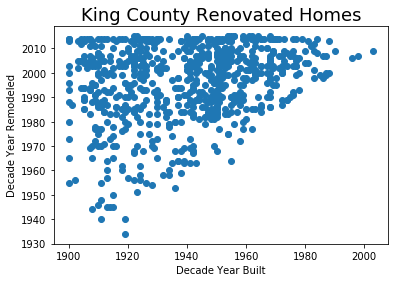

In [37]:
plt.scatter(x=new_df['yr_built'], y=new_df['yr_renovated'])
plt.xlabel('Decade Year Built')
plt.ylabel('Decade Year Remodeled')
plt.title("King County Renovated Homes", fontsize=18)

Text(0.5, 1.0, 'King County Renovated Homes')

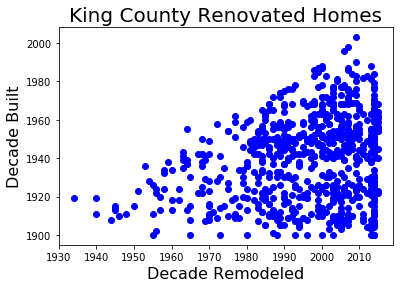

In [38]:
plt.scatter(y=new_df['yr_built'], x=new_df['yr_renovated'], color='blue')
#plt.plot([new_df['id'] == 3600057])
plt.ylabel('Decade Built',fontsize=16)
plt.xlabel('Decade Remodeled',fontsize=16)
plt.title("King County Renovated Homes", fontsize=20)

In [39]:
new_df.loc[new_df['id'] == 3600057]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3553,3600057,3/19/2015,402500.0,4,2.0,1650,3504,1.0,0.0,0.0,...,7,760,890.0,1951,2013.0,98144,47.5803,-122.294,1480,3504


In [40]:
new_df.loc[new_df['yr_built'] == 1900]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1927,2767603215,5/16/2014,490000.0,3,2.00,1450,2400,1.5,NaN,0.0,...,8,1450,0.0,1900,2003.0,98107,47.6726,-122.381,1450,4275
2564,3037200060,9/26/2014,499000.0,3,2.50,1750,2150,2.5,0.0,0.0,...,7,1230,520.0,1900,2014.0,98122,47.6037,-122.311,1410,3300
4201,6300000337,5/29/2014,550000.0,5,2.00,2450,9488,1.0,0.0,0.0,...,7,1240,1210.0,1900,1955.0,98133,47.7056,-122.340,1310,5693
6665,475001235,8/8/2014,870000.0,5,4.00,3400,5000,2.0,0.0,0.0,...,8,2320,1080.0,1900,2013.0,98107,47.6655,-122.363,1910,5000
8849,844000180,2/25/2015,200000.0,4,1.50,1780,8000,2.0,0.0,0.0,...,6,1080,700.0,1900,1996.0,98010,47.3124,-122.003,1750,9147
10515,5318100935,10/20/2014,850000.0,3,2.00,1540,3600,2.0,0.0,0.0,...,8,1540,0.0,1900,1988.0,98112,47.6343,-122.283,2970,3600
11239,625100004,3/17/2015,450000.0,3,2.00,1540,67756,1.0,0.0,0.0,...,7,1540,0.0,1900,1973.0,98077,47.7210,-122.078,2060,67756
11683,5699000070,5/28/2014,1400000.0,4,3.25,2980,7000,2.0,0.0,3.0,...,10,2140,840.0,1900,2014.0,98144,47.5933,-122.292,2200,4800
12146,3343903240,7/22/2014,452000.0,3,2.00,2270,148975,1.0,NaN,0.0,...,6,1270,1000.0,1900,1980.0,98056,47.5092,-122.195,2210,17388
12826,1421069123,9/9/2014,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,...,6,1020,0.0,1900,1965.0,98010,47.3127,-122.002,1600,9700


In [41]:
new_df.loc[(new_df['lat'] == 47.6726) & (new_df['long'] == -122.381)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1927,2767603215,5/16/2014,490000.0,3,2.0,1450,2400,1.5,NaN,0.0,...,8,1450,0.0,1900,2003.0,98107,47.6726,-122.381,1450,4275


In [42]:
#worthless boxplots!!!
#new_df = new_df.drop(["id"], axis=1)
#new_df = new_df.drop(['price'], axis=1)
#new_df = new_df.drop(["sqft_living",'sqft_living15'], axis=1)
#new_df = new_df.drop(["sqft_lot",'sqft_lot15'], axis=1)
#new_df = new_df.drop(['zipcode'], axis=1)
#new_df = new_df.drop(['sqft_above'], axis=1)

#sns.boxplot(data=new_df).set(xlabel = "X Label", ylabel='Y Label', title='Example Boxplot')


In [ ]:
new_df.describe()

Text(0.5, 1.0, 'King County Renovated Homes')

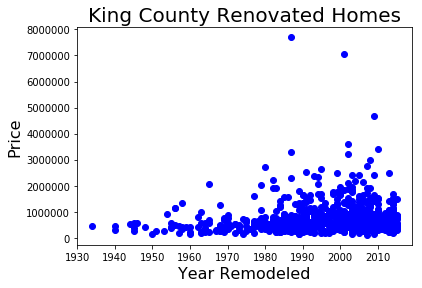

In [44]:
plt.scatter(y=new_df['price'], x=new_df['yr_renovated'], color='blue')
#plt.plot([new_df['id'] == 3600057])
plt.ylabel('Price',fontsize=16)
plt.xlabel('Year Remodeled',fontsize=16)
plt.title("King County Renovated Homes", fontsize=20)

Text(0.5, 1.0, 'King County Renovated Homes')

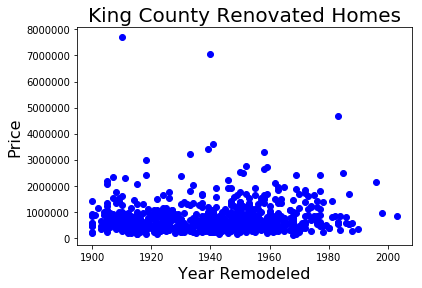

In [45]:
plt.scatter(y=new_df['price'], x=new_df['yr_built'], color='blue')
#plt.plot([new_df['id'] == 3600057])
plt.ylabel('Price',fontsize=16)
plt.xlabel('Year Remodeled',fontsize=16)
plt.title("King County Renovated Homes", fontsize=20)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


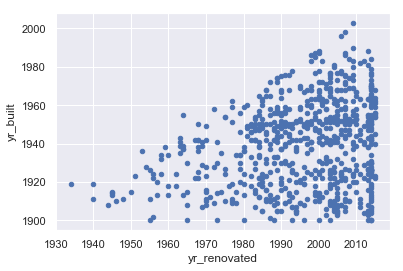

In [52]:
new_df.plot.scatter(x="yr_renovated", y="yr_built")

In [63]:
new_df.price.mean() + new_df.price.std()*3

2650279.274607869

In [66]:
new_df = new_df.loc[new_df['price'] < 2650279]

In [60]:
new_df.yr_renovated.fillna(value=new_df.yr_renovated.median(), inplace = True)


//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Year Renovated')

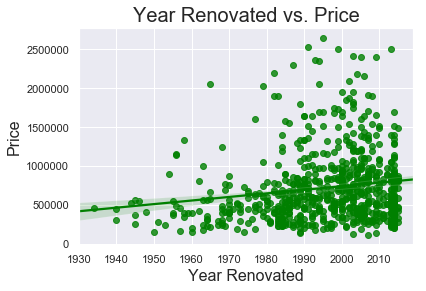

In [71]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(y=new_df["price"], x=new_df["yr_renovated"], data=data, color="green")
plt.title("Year Renovated vs. Price", fontsize=20)
plt.ylabel('Price',fontsize=16)
plt.xlabel('Year Renovated',fontsize=16)

Text(0.5, 1.0, 'Condition of King County Homes')

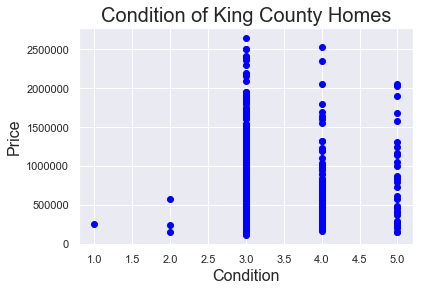

In [72]:
plt.scatter(y=new_df['price'], x=new_df['condition'], color='blue')
#plt.plot([new_df['id'] == 3600057])
plt.ylabel('Price',fontsize=16)
plt.xlabel('Condition',fontsize=16)
plt.title("Condition of King County Homes", fontsize=20)

In [77]:
new_df.condition.describe()

count    734.000000
mean       3.219346
std        0.521941
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: condition, dtype: float64

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Condition')

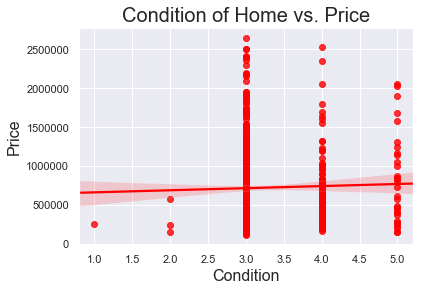

In [78]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(y=new_df["price"], x=new_df["condition"], data=new_df, color="red")
plt.title("Condition of Home vs. Price", fontsize=20)
plt.ylabel('Price',fontsize=16)
plt.xlabel('Condition',fontsize=16)

In [48]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900, 1970, 1980, 1990, 2000, 2010, 2020]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins_A)
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()


yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr_ren")
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [55]:
bins_yr_renovated.head()

0             NaN
1    (1990, 2000]
2             NaN
3             NaN
4             NaN
Name: yr_renovated, dtype: category
Categories (7, interval[int64]): [(0, 1900], (1900, 1970], (1970, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]